<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дипломная работа по курсу «Python для анализа данных»

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics

# 1.Загрузить файл hr.csv.

In [2]:
df=pd.read_csv('HR.csv')


In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [135]:
#Здесь видно, что все столбцы числовые, кроме sales и salary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [136]:
#2.1.
#проверяем на наличие пропусков в данных. Пропусков нет, dropna можно не делать.
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [137]:
#Рассчитываем через describe среднее (mean), минимум (min), максимум (max) и среднее отклонение (std)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [138]:
#2.2. Считаем медиану
print('Медиана показателей:\n\nуровень удовлетворенности:',statistics.median(df['satisfaction_level']),
      '\nПоследняя оценка:', statistics.median(df['last_evaluation']), 
      '\nНомер проекта:', statistics.median(df['number_project']), 
      '\nСреднее количество отработанных часов в месяц:', statistics.median(df['average_montly_hours']),
      '\nТравмы на производстве:', statistics.median(df['Work_accident']),
      '\nПокинули компанию:', statistics.median(df['left']), 
      '\nПродвижение по службе за последние 5 лет:', statistics.median(df['promotion_last_5years']))

Медиана показателей:

уровень удовлетворенности: 0.64 
Последняя оценка: 0.72 
Номер проекта: 4 
Среднее количество отработанных часов в месяц: 200 
Травмы на производстве: 0 
Покинули компанию: 0 
Продвижение по службе за последние 5 лет: 0


In [139]:
#2.3 Считаем моду
print('Мода:\nуровень удовлетворенности:',statistics.mode(df['satisfaction_level']))


Мода:
уровень удовлетворенности: 0.1


In [140]:
print('Последняя оценка:', statistics.mode(df['last_evaluation']))

Последняя оценка: 0.55


In [69]:
print('Номер проекта:', statistics.mode(df['number_project']))

Номер проекта: 4


In [91]:
#мода здесь не считается, т.к. в столбце 2 наиболее повторяющихся значения

statistics.mode(df['average_montly_hours'])

StatisticsError: no unique mode; found 2 equally common values

In [92]:
print('Травмы на производстве:', statistics.mode(df['Work_accident']))

Травмы на производстве: 0


In [93]:
print('Покинули компанию:', statistics.mode(df['left']))

Покинули компанию: 0


In [95]:
print('Травмы на производстве:', statistics.mode(df['Work_accident']))

Травмы на производстве: 0


In [94]:
print('Продвижение по службе за последние 5 лет:', statistics.mode(df['promotion_last_5years']))

Продвижение по службе за последние 5 лет: 0


# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [3]:
#Статистически сильная (относительно) взаимосвязь между:
# 1) уровнем удовлетворенности и уходом сотрудников из компании
# 2) Номером проекта и количеством отработанных часов
# 3) Номером проекта и последней оценкой 
# 4) Присутствует небольшая корреляция между увольнениями и происшествиями на рабочих местах
df.corr().style.background_gradient(cmap='Greens').set_precision(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.1,-0.1,-0.02,-0.1,0.06,-0.4,0.03
last_evaluation,0.1,1,0.3,0.3,0.1,-0.007,0.007,-0.009
number_project,-0.1,0.3,1,0.4,0.2,-0.005,0.02,-0.006
average_montly_hours,-0.02,0.3,0.4,1,0.1,-0.01,0.07,-0.004
time_spend_company,-0.1,0.1,0.2,0.1,1,0.002,0.1,0.07
Work_accident,0.06,-0.007,-0.005,-0.01,0.002,1,-0.2,0.04
left,-0.4,0.007,0.02,0.07,0.1,-0.2,1,-0.06
promotion_last_5years,0.03,-0.009,-0.006,-0.004,0.07,0.04,-0.06,1


In [114]:
#на всякий случай проверяем данные по полю left - по количеству 0 и 1
df.groupby(['left']).agg(['count'])


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
,count,count,count,count,count,count,count,count,count
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


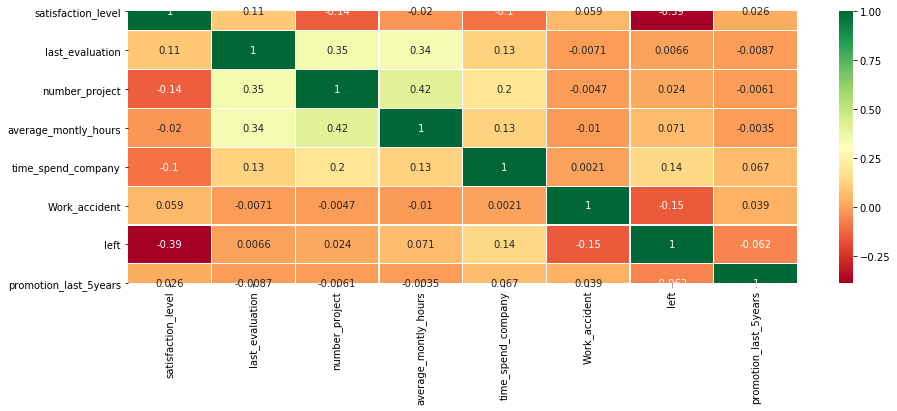

In [41]:
#Визуализируем корреляцию при помощи тепловой карты. Результаты, соответственно, такие же.
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(15,5)
plt.show()

# 4.Визуализировать несколько взаимосвязей между переменными.

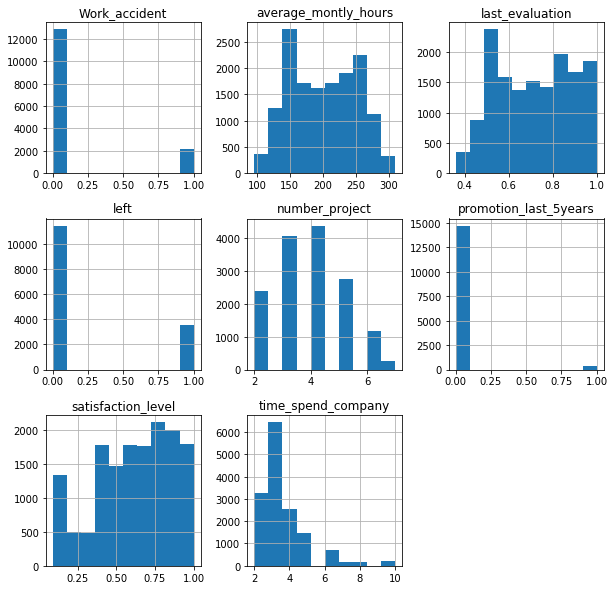

In [60]:
#Смотрим на распределение данных. 
df.hist(figsize=(10,10))
plt.grid(True)
plt.show()

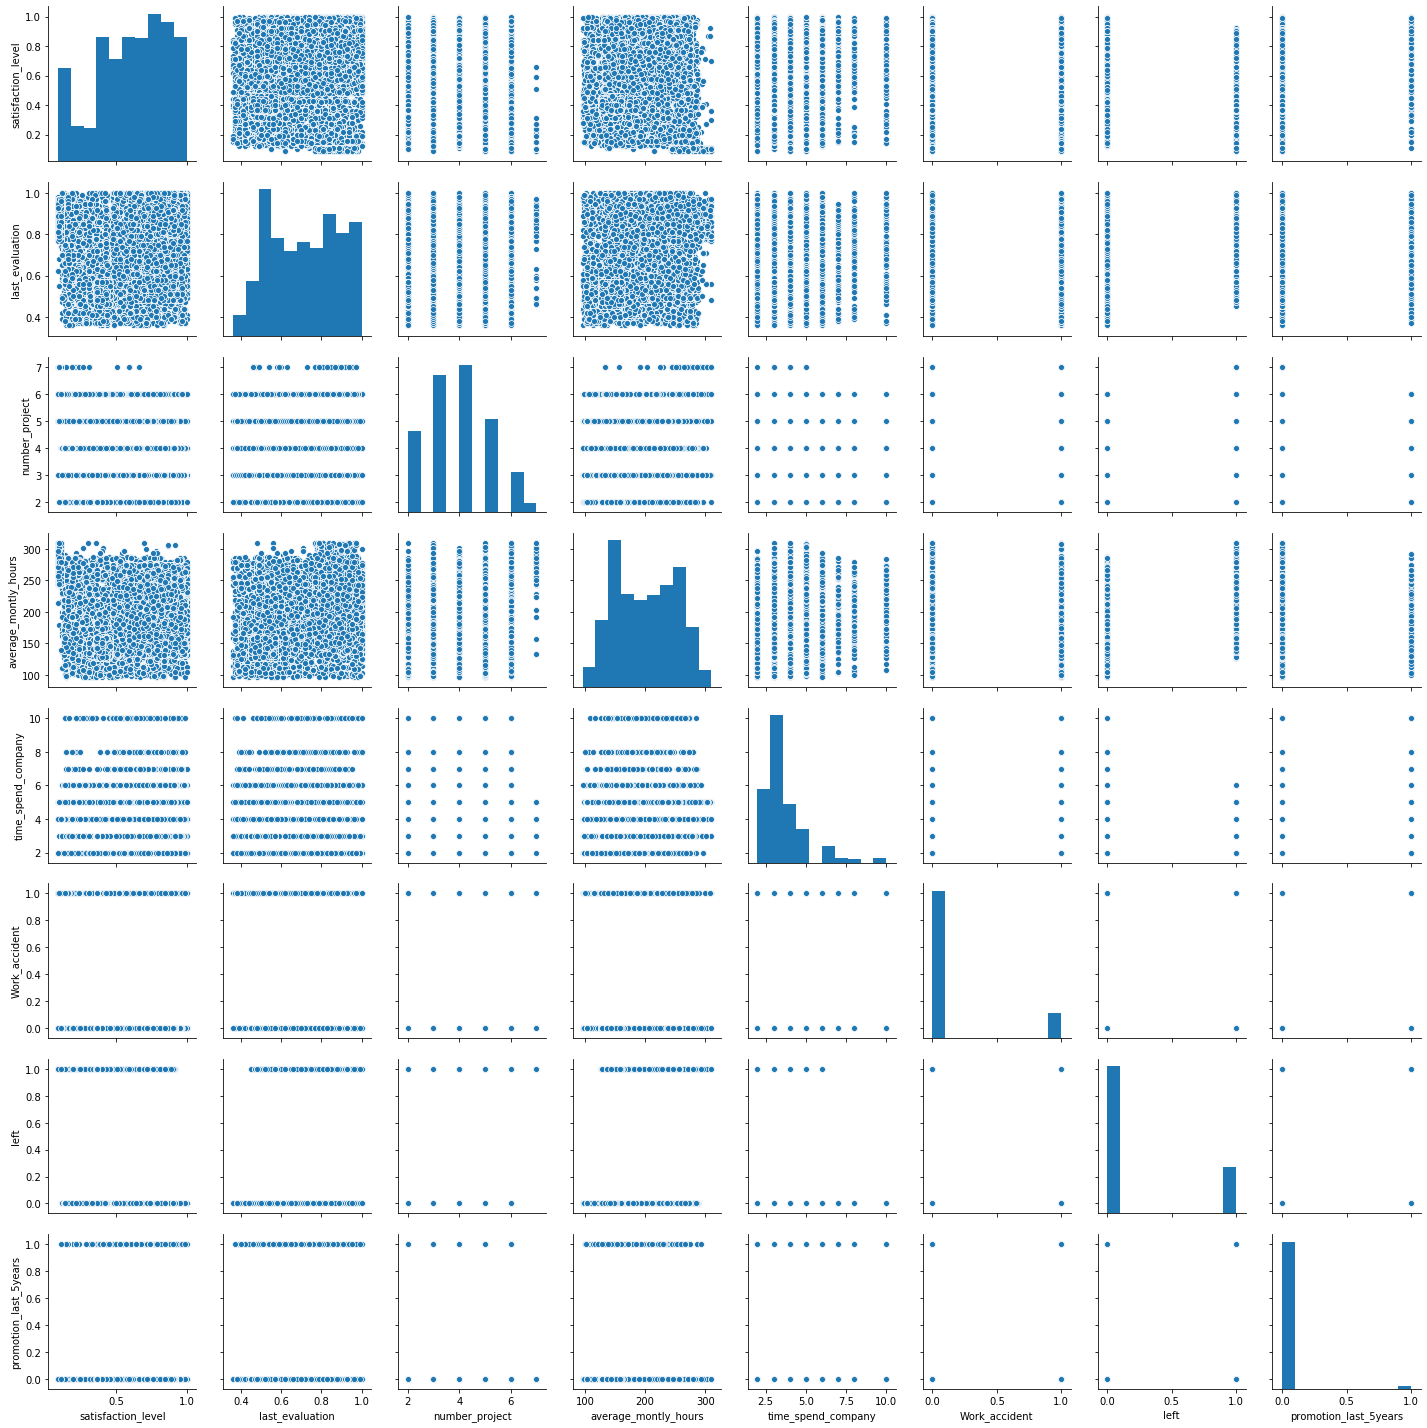

In [61]:
#Смотрим графически связи между всеми метриками датафрейма 
sns.pairplot(df)

In [116]:
#Выписываем названия столбцов, чтобы использовать их дальше
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

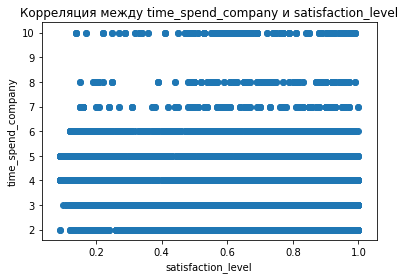

In [52]:
#4.1. Визуализация взаимосвязи между удовлетворенностью работой и продолжительностью работы

#Гипотеза: чем дольше люди работают в компании, тем более они удовлетворены работой в ней
#По графику видно, что много пробелов по оси X  от 0,2 до 0,5 для работающих от 7 лет. 
#Но все равно есть те, кто работают долго и имеют удовлетворенность ниже 0,4 и 0,2.
#Сильной прямой взаимосвязи нет.

plt.xlabel('satisfaction_level')
plt.ylabel('time_spend_company')
plt.scatter(df['satisfaction_level'], df['time_spend_company'])
plt.title('Корреляция между time_spend_company и satisfaction_level')
plt.show()


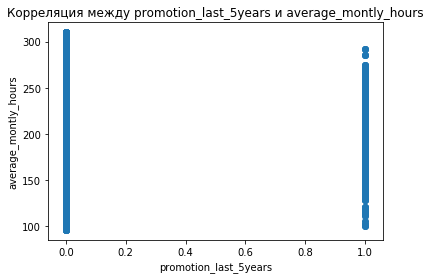

In [55]:
#4.2. Визуализация взаимосвязи между количеством отработанных часов и продвижением по службе
#Гипотеза: люди, проработавшие бОльшее количество часов, получили продвижение
#графически здесь связи нет.

plt.xlabel('promotion_last_5years')
plt.ylabel('average_montly_hours')
plt.scatter(df['promotion_last_5years'], df['average_montly_hours'])
plt.title('Корреляция между promotion_last_5years и average_montly_hours')
plt.show()

In [52]:
#4.3. Визуализация взаимосвязи между величиной зарплаты и удовлетворенностью работой 
#Заменим зарплаты на цифры, чтобы проверить корреляцию между зарплатой и удовлетворенностью работой
df_new_salary=df.replace('low', 1).replace('high', 3).replace('medium',2)
df_new_salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


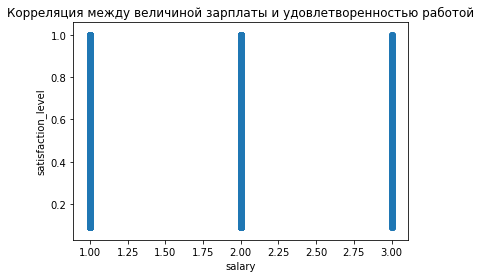

In [103]:
#Гипотеза: чем выше выше зарплата, тем больше удовлетворенность работой
#Графически гипотеза не подтверждается: при любом уровне ЗП есть неудовлетворенные работой

plt.xlabel('salary')
plt.ylabel('satisfaction_level')
plt.scatter(df_new_salary['salary'], df_new_salary['satisfaction_level'])
plt.title('Корреляция между величиной зарплаты и удовлетворенностью работой')
plt.show()

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [102]:
#5.1. Попробуем проверить еще раз взаимосвязь из п. 4.3.: между величиной зарплаты и удовлетворенностью работой
#Нулевая гипотеза: уровень заработной платы никак не влияет на удовлетворенность работой.
#Делаем выборки для сотрудников с высокой и низкой зарплатой

low_salary=df_new_salary[df_new_salary['salary']==1]['satisfaction_level']
high_salary=df_new_salary[df_new_salary['salary']==3]['satisfaction_level']
high_salary

72       0.45
111      0.09
189      0.44
267      0.45
306      0.37
         ... 
14829    0.45
14868    0.43
14902    0.45
14941    0.43
14980    0.76
Name: satisfaction_level, Length: 1237, dtype: float64

In [125]:
print('размер выборки по ВЫСОКИМ зарплатам:',len(high_salary), '\nразмер выборки по НИЗКИМ зарплатам:', len(low_salary))

размер выборки по ВЫСОКИМ зарплатам: 1237 
размер выборки по НИЗКИМ зарплатам: 7316


In [103]:
#sampling
low_salary=low_salary.sample(1000)
high_salary=high_salary.sample(1000)


In [127]:
#Считаем дисперсию для каждой выборки
statistics.variance(low_salary), statistics.variance(high_salary)

(0.06858648088088089, 0.05195759269269269)

In [129]:
print(stats.ttest_ind(low_salary, high_salary))

Ttest_indResult(statistic=-4.090440909882726, pvalue=4.476415815400886e-05)


p-value < 0.05, поэтому отклоняем нулевую гипотезу, считаем, что в результатах оценки есть статистически значимые отличия

In [190]:
print('посчитаем также среднюю удовлетворенность работой: на', round((low_salary.mean()/high_salary.mean()-1)*100,2),'% \nудовлетворенность работой сотруников с низкой ЗП ниже, чем у сотрудников с высокой ЗП')

посчитаем также среднюю удовлетворенность работой: на -7.03 % 
удовлетворенность работой сотруников с низкой ЗП ниже, чем у сотрудников с высокой ЗП


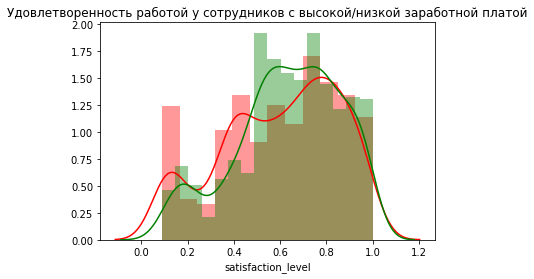

In [112]:
#Построим графики. 
sns.distplot(low_salary,  color='r').set_title('Удовлетворенность работой у сотрудников с высокой/низкой заработной платой')
sns.distplot(high_salary, color='g')

БОльшая часть людей с высокой ЗП имеет удовлетворенность выше 0,5 единиц.

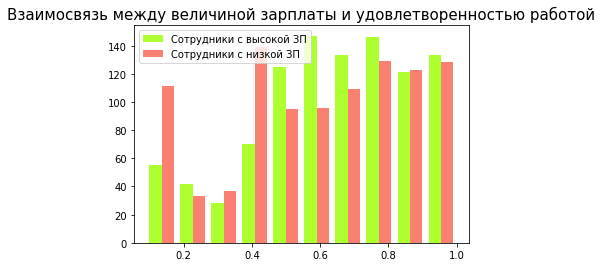

In [189]:
#По графику прослеживается высокий столбец в промежутке от 0 до 0,2 единицы и на уровне 0,4 для сотрудников с низкой ЗП
#У сотрудников с высокой ЗП высокие столбцы сконцентрированы ближе к единице, начиная с 0,5.
plt.hist([high_salary, low_salary], color=['greenyellow', 'salmon'])
legend = ['Сотрудники с высокой ЗП', 'Сотрудники с низкой ЗП']
plt.legend(legend)
plt.title('Взаимосвязь между величиной зарплаты и удовлетворенностью работой',fontsize=15)
plt.show()


In [ ]:
#5.2. Предположим, что есть отдельные проекты, по которым высокие увольнения из-за перегруженности работой. 
#Гипотеза H0: загруженность сотрудников на проекте не влияет на left rate.


In [16]:
#Делаем сводную таблицу, где считаем долю уволившихся cотрудников в каждом проекте от числа вовлеченных в проект
pivot_project=df.pivot_table(index=['number_project'],columns=['left'],values='satisfaction_level',aggfunc='count', margins=True).fillna('0')
pivot_project['Share of employees left (%)']=round(100*(pivot_project[1]/pivot_project['All']),2)
pivot_project.sort_values(by='Share of employees left (%)', ascending=False).drop('All').style.bar()


left,0,1,All,Share of employees left (%)
number_project,,,,
7,0,256,256,100
2,821,1567,2388,65.62
6,519,655,1174,55.79
5,2149,612,2761,22.17
4,3956,409,4365,9.37
3,3983,72,4055,1.78


Видно, что выделяются проекты 7,2,6. Проверим их vs проекты с низкой left rate.
Возьмем проекты 2 vs 5, т.к. на них похожая величина вовлеченных людей, т.е. проекты близки по масштабу.
Дополнительно возьмем проект 4.

In [388]:
#Формируем выборки
project2_bad=df[df['number_project']==2].average_montly_hours
project5_good=df[df['number_project']==5].average_montly_hours
project4_good=df[df['number_project']==4].average_montly_hours

In [389]:
#sampling
project2_bad=project2_bad.sample(2000)
project5_good=project5_good.sample(2000)
project4_good=project4_good.sample(2000)

In [395]:
#Считаем дисперсию для каждой выборки
statistics.variance(project2_bad), statistics.variance(project5_good), statistics.variance(project4_good)

(1518.8255825412707, 2045.009895947974, 2072.686252876438)

In [377]:
Смотрим среднее, минимум и максимум
project2_bad.mean(), project2_bad.max(), project2_bad.min()

(160.6875, 310, 96)

In [378]:
project5_good.mean(), project5_good.max(), project5_good.min()

(212.7005, 307, 96)

In [390]:
project4_good.mean(), project4_good.max(), project4_good.min()

(204.3655, 301, 96)

In [392]:
print(stats.ttest_ind(project2_bad, project5_good))

Ttest_indResult(statistic=-38.41791856457427, pvalue=4.053643323180353e-275)


In [396]:
print(stats.ttest_ind(project2_bad, project4_good))

Ttest_indResult(statistic=-32.682163171812384, pvalue=7.5063843259639905e-208)


p-value < 0.05 для обоих пар: проект 5vs2, 5vs4, поэтому отклоняем нулевую гипотезу, считаем, что в результатах оценки есть статистически значимые отличия

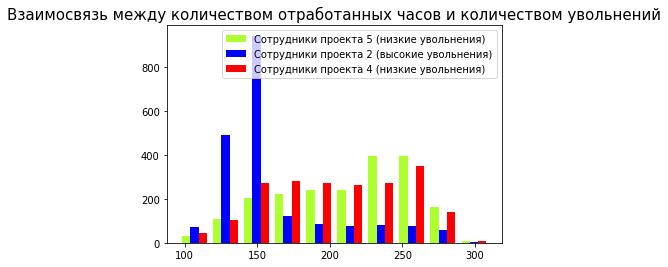

In [394]:
#Изображаем выборки графически
plt.hist([project5_good, project2_bad, project4_good], color=['greenyellow', 'b', 'r'])
legend = ['Сотрудники проекта 5 (низкие увольнения)', 'Сотрудники проекта 2 (высокие увольнения)', 'Сотрудники проекта 4 (низкие увольнения)']
plt.legend(legend)
plt.title('Взаимосвязь между количеством отработанных часов и количеством увольнений',fontsize=15)
plt.show()

Исходя из графика, можно сделать выводы, что на проекте 2 была неравномерная нагрузка на персонал, в отличие от проектов 5 и 4. В проекте 2 бОльшая часть людей работала 130-150 часов в месяц, но есть также сотрудники, которые работали значительно дольше. Среди них могло быть недовольство распределением задач, что привело к увольнениям. 

Чтобы окончательно убедиться в этом, возьмем данные по уволившимся и посмотрим их часы работы в месяц. 

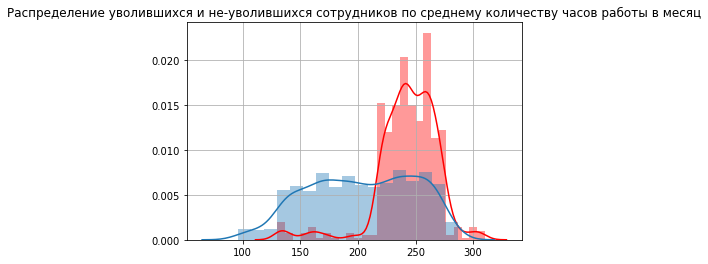

In [97]:
z=df[(df['number_project']==5)&(df['left']==1)][['average_montly_hours']]
sns.distplot(z, color='r').set_title('Распределение уволившихся и не-уволившихся сотрудников по среднему количеству часов работы в месяц')
z1=df[(df['number_project']==5)&(df['left']==0)][['average_montly_hours']]
plt.grid(True)
sns.distplot(z1)
plt.show()

По графику видно, что уволившиеся сотрудники работали от ~220 до ~270 часов в месяц в среднем, т.е. много относительно большинства оставшихся сотрудников.

# 6.Рассчитать сколько работников работает в каждом департаменте.

In [61]:
df.groupby(['sales']).sales.count().sort_values(ascending=False)


sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

# 7.Показать распределение сотрудников по зарплатам.

In [167]:
#Смотрим какие есть варианты по зарплатам
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [4]:
df.groupby(['salary']).salary.count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

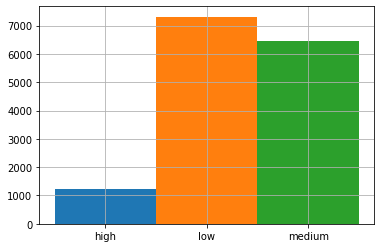

In [142]:
df.groupby(['salary']).salary.hist(bins=1)
plt.show()


# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.


In [11]:
#Строим сводную таблицу
pivot=df.pivot_table(index=['sales'],columns=['salary'],values='left',aggfunc='count')
pivot



salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


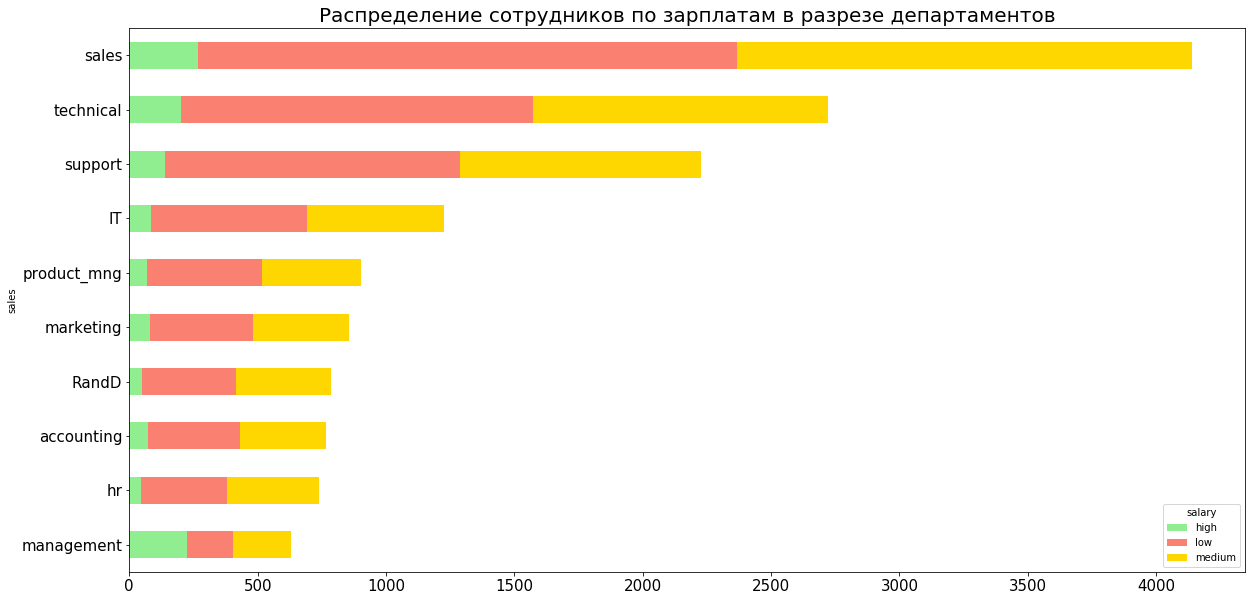

In [66]:
pivot.sort_values(by='low', ascending=True).plot(kind = 'barh', rot=360, stacked=True, figsize=(20,10), color=('lightgreen', 'salmon', 'gold'),  fontsize=15)
plt.title('Pаспределение сотрудников по зарплатам в разрезе департаментов', fontsize=20)
plt.show()

# 9.Сколько сотрудников покинули компанию.


In [232]:
#Смотрим какие значения есть в поле left
df.left.unique()

array([1, 0], dtype=int64)

In [243]:
#Т.к. есть только нули или единицы, ставим фильтр на единицу
df.left.loc[df['left'] ==1].count()

3571

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.


In [102]:
# Меняем  текстовые данные на числовые
df_final=df_new_salary.replace('sales', 1).replace('accounting', 2).replace('hr',3).replace('technical',4).replace('support',5).replace('IT',6).replace('product_mng',7).replace('RandD',8).replace('management',9).replace('marketing',10)
df_final


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,5,1
14995,0.37,0.48,2,160,3,0,1,0,5,1
14996,0.37,0.53,2,143,3,0,1,0,5,1
14997,0.11,0.96,6,280,4,0,1,0,5,1


In [147]:
#Основываясь на pvalue, проводим t-тест по всем уволившимся сотрудникам
alpha = 0.05
for i in df_final:
   
    t = stats.ttest_1samp(df_final[df_final.left==1][i], df_final[i].mean())[1]
    if t > alpha:
        print(f'Уход сотрудников из компании связан с {i} (pvalue {round(t, 3)}) при альфа={alpha}\n')
 

Уход сотрудников из компании связан с last_evaluation (pvalue 0.678) при альфа=0.05

Уход сотрудников из компании связан с number_project (pvalue 0.074) при альфа=0.05



Т.к. поле last evaluation раньше мы не проверяли, посмотрим его.

In [130]:
df[df['left']==0]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


In [131]:
df[df['left']==1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2000,0.062799,-0.067111,-0.109229,-0.132790,0.332547,1.000000,1.0,1.000000,sales,low
2001,-0.396238,0.129462,1.000000,-0.009040,0.332547,1.000000,1.0,1.000000,sales,low
2002,0.311444,0.073299,-0.663844,0.076633,0.332547,1.000000,1.0,1.000000,sales,low
2003,-0.319732,-0.291766,-0.663844,-0.437406,0.332547,1.000000,1.0,1.000000,sales,low
2004,0.234938,0.326035,0.445385,-0.123271,1.000000,1.000000,1.0,1.000000,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,-0.549250,0.466445,0.445385,-0.551637,-4.339623,-5.915168,1.0,-46.018809,management,high
14207,-0.243226,-0.656830,-0.663844,-0.618272,-4.339623,1.000000,1.0,-46.018809,management,high
14208,-0.453618,0.494526,0.445385,0.152787,-4.339623,1.000000,1.0,-46.018809,management,high
14209,0.540963,0.185626,0.445385,0.276537,-4.339623,1.000000,1.0,-46.018809,marketing,high


Выяснилось, что поле last evaluation заполнено только для уволненных сотрудников. Видимо, это последняя оценка при увольнении. Поэтому не будем принимать этот фактор как значимый при анализе гипотез.

В итоге, основная гипотеза - основные увольнения идут в зависимости от проектов+загруженности.
Как мы выяснили в п.5, наблюдается неудачное распределение рабочего времени между персоналом, и увольняются, в основном, перегружненные сотрудники (см. крайний график в п.5)

# Выводы по результатам исследований по пунктам 3-9

Что планировалось получить:
Основная цель была - выявить ключевые взаимосвязи между представленными в датафрейме метриками:
удовлетворенность работой vs увольнения vs заработная плата vs номер проекта vs длительность работы в компании
Понять почему люди неудволетворены работой и почему увольняются. И, наоборот, что приводит к сохранению персонала компании на местах.

Что было сделано:
1. Была построена матрица корреляции между всеми переменными полученного датафрейма
2. Были визуализированы при помощи графиков взаимосвязи между переменными, а также проверены статистические взаимосвязи между ними при помощи t-статистики

3.Рассчитано:
- количество работающих сотрудников в разрезе департаментов
- количество уволившихся сотрудников, в т.ч. по проектам 
- распределение сотрудников по зарплатам, в т.ч. в разрезе департаментов
- построены графики распределений всех величин. 


Какие выводы можно сделать?
Делаем вывод о статистической взаимосвязи между:

1. Уровнем удовлетворенности и увольнениями. Коэффициент корреляции между ними выше, чем между любыми другими 
метриками: -40%. Отрицательный знак корреляции говорит об обратной зависимости: чем ниже удовлетворенность работой, тем выше количество увольнений. Эта связь логичная: недовольные работой сотрудники увольняются с более высокой вероятностью, чем довольные работой.

2. Связь между номером проекта и увольнениями: рассчитан % уволившихся по проектам. Было выявлено, что отдельные проекты имели очень высокий (в т.ч. 100%-ый left-rate).
Это навело на мысль о необходимости сопоставить выборки между проектами с лучшими и худшими left-rate. При помощи t-статистики выяснилось, что выборки действительно имеют статистически -значимые отличия:

на одном из проектов с высоким left-rate (проект 2) была неравномерная нагрузка на персонал, в отличие от проектов с низким left-rate (проекты 5 и 4). 

В проекте с высоким left-rate бОльшая часть людей работала 130-150 часов в месяц, но были также сотрудники, которые работали значительно дольше. Как выяснилось дальше при построении графической аналитики, именно перегруженные относительно среднего сотрудники увольнялись и создали критическую статистику по отдельным проектам. 

3.Были выставлены ряд гипотез, которые были отклонены в результате анализа:

- люди, которые работают в компании дольше, имеют более высокую удволетворенность
- люди, проработавшие бОльшее количество часов, получили продвижение
- уровень заработной платы никак не влияет на удовлетворенность работой, т.к. люди быстро привыкают к своему уровню дохода.
Данная взаимосвязь была проанализирована графически. 

Для сотрудников с низкой ЗП:
По графику прослеживается самое большое скопление сотрудников в промежутке от 0 до 0,2 единицы по шкале удовлеторенности и на уровне 0,4 . 

У сотрудников с высокой ЗП:
наибольшие столбцы по количеству человек сконцентрированы ближе к единице, начиная с 0,5. 

То есть люди с более высокой зарплатой склонны быть более удовлеторенными своей работой , а значит, реже увольняются. 